First is necessary to know which files are going to be used in the data set, in our case we tried to use all the information avaiable (so we should have 1012 patient id's inside our local copy of the LIDC-IDRI) so that we could get more accurate results and since we would be using "one" image from each pacient "nodule"

In [2]:
import os

#specify the path to your dataset where you have the folders with the name of the pacients
directory="data/dataset/LIDC-IDRI/"
#list all the folders inside our local copy of LIDC-IDRI (that correspond to the patient id's that are going to be used to get the scans and annotations)
folders=os.listdir(directory)

print(f"Number of patients in the dataset: {len(folders)}")
#just so that it is easier to know which patients we are don't have in our copy of the LIDC-IDRI
folders.sort()
print()
#printing the patients id's that we couldn't download
print("List of the id's that are missing from our dataset:")
count=1
for folder in folders:
    if(str(count) not in folder):
        print(folder)
        count=int(folder.split('-')[-1])
    count+=1


Number of patients in the dataset: 1010

List of the id's that are missing from our dataset:
LIDC-IDRI-0239
LIDC-IDRI-0586


As it is possible to see the number is diferent from the expected (1012 number of people that are avaiable in the original LODC-IRDI), this is due to the fact that during the download (which was made using the offical tool nbia-data-retriver) we did not have authority to download this instances

In [3]:
import pylidc as pl

n_lesions=0
scans_0_nods=[]

for folder in folders:
    pid=folder

    #get the scann corresponding to the patient_id that we have 
    scan=pl.query(pl.Scan).filter(pl.Scan.patient_id==pid).first()
    #get all the nodules annotations, each list corresponds to the same nodules
    nods=scan.cluster_annotations()    
    n_lesions+=len(nods)
    if(len(nods)==0):
        scans_0_nods.append([scan.patient_id,scan.annotations])
        


print(f"Number of lesions: {n_lesions}" )
print(f"Number of scanns with 0 nodules: {len(scans_0_nods)}")
print(scans_0_nods)
#13 of them gave an error so in total we have 123 scanns with 0 annotations


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

As it is possible to see above some of the scans don't have nodules/annotations 

Loading dicom files ... This may take a moment.
cbbox: (102, 79, 9)
cmask: (102, 79, 9)


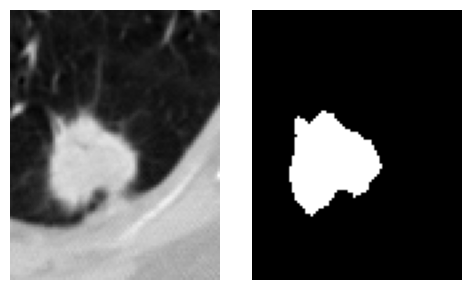

In [4]:
from pylidc.utils import consensus
import matplotlib.pyplot as plt
for folder in folders:
    pid=folder

    #get the scann corresponding to the patient_id that we have 
    scan=pl.query(pl.Scan).filter(pl.Scan.patient_id==pid).first()
    
    #get all the nodules annotations, each list corresponds to the same nodules
    nods=scan.cluster_annotations()
    #nods is a list of list of annotations agrouped by nodule

    #create an volume with all of the dicom images of that scan (basicly an 3D image of the CT)
    vol=scan.to_volume()

    padding=[(30,20),(10,25),(0,0)]
    #annss represents all the annotations for this nodule
    for anns in nods:
        #get the concensus for the contours of this nodule
        cmask,cbbox,masks=consensus(anns,clevel=0.5,pad=padding)

        #get the central slice of the computed bounding box
        k=int(0.5*(cbbox[2].stop-cbbox[2].start))

        print(f"cbbox: {vol[cbbox].shape}")
        print(f"cmask: {cmask.shape}")

        fig,ax = plt.subplots(1,2,figsize=(5,3))
        ax[0].imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray)
        ax[0].axis('off')

        ax[1].imshow(cmask[:,:,k], cmap=plt.cm.gray)
        ax[1].axis('off')

        plt.tight_layout()
        plt.show

        break

    break




